In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

seed = 42
np.random.seed(seed+1)
torch.manual_seed(seed)

# Logistic Regression

$$\hat y = \sigma(Wx+b)$$
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In [4]:
x = np.linspace(0, 10, 100)
y = np.round(x / 10)
x.shape, y.shape

((100,), (100,))

In [5]:
w = np.random.normal(0, 1)
b = np.random.normal(0, 1)
z = w * x + b
yhat = 1 / (1 + np.exp(-z))
yhat.shape

(100,)

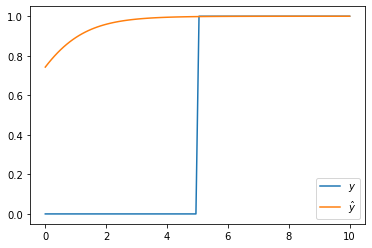

In [6]:
plt.plot(x, y, label='$y$')
plt.plot(x, yhat, label='$\hat y$')
plt.legend()
plt.show()

In [7]:
loss = np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
loss

-1.8625023657469413

In [8]:
w = np.random.normal(0, 1)
b = np.random.normal(0, 1)

lr = 0.1
n_iters = 100000
for i in range(n_iters):
    z = w * x + b
    yhat = 1 / (1 + np.exp(-z))
    loss = - np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    dw = 1/len(x) * x.T @ (yhat - y)
    db = np.mean(yhat - y)
    w = w - lr * dw
    b = b - lr * db
    if i % (n_iters // 10) == 0:
        lr = lr / 3
        print(f'w={round(w, 5)} \t b={round(b, 5)} \t loss={round(loss, 5)}')

w=0.01669 	 b=-0.24651 	 loss=1.49178
w=1.80158 	 b=-8.83055 	 loss=0.09117
w=1.9931 	 b=-9.80539 	 loss=0.08226
w=2.04949 	 b=-10.09174 	 loss=0.07995
w=2.06761 	 b=-10.18376 	 loss=0.07924
w=2.07359 	 b=-10.21407 	 loss=0.07901
w=2.07557 	 b=-10.22414 	 loss=0.07893
w=2.07623 	 b=-10.22749 	 loss=0.07891
w=2.07645 	 b=-10.22861 	 loss=0.0789
w=2.07652 	 b=-10.22898 	 loss=0.0789


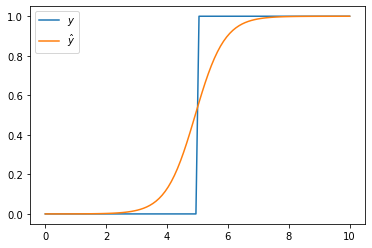

In [9]:
plt.plot(x, y, label='$y$')
plt.plot(x, yhat, label='$\hat y$')
plt.legend()
plt.show()

In [10]:
x_np = np.linspace(0, 10, 100)
y_np = np.round(x_np / 10)

x = torch.from_numpy(x_np).reshape(-1,1).float()
y = torch.from_numpy(y_np).reshape(-1,1).float()
input_shape, output_shape = x.shape[1], y.shape[1]

In [11]:
model = nn.Sequential(
    nn.Linear(input_shape, output_shape),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

In [12]:
yhat = model(x)
loss_fn = nn.BCELoss()
loss_fn(yhat, y)

tensor(1.4141, grad_fn=<BinaryCrossEntropyBackward0>)

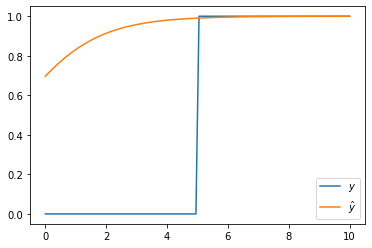

In [13]:
plt.plot(x.numpy(), y.numpy(), label='$y$')
plt.plot(x.numpy(), yhat.detach().numpy(), label='$\hat y$')
plt.legend()
plt.show()

In [14]:
lr = 0.03
opt = torch.optim.SGD(model.parameters(), lr=lr)
num_iters = 30000
for i in range(num_iters):
    yhat = model(x)
    loss = loss_fn(yhat, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    if i % (num_iters // 10) == 0:
        w,b = [x.detach().item() for x in list(model.parameters())]
        print(f'w={round(w, 5)} \t b={round(b, 5)} \t loss={round(loss.item(), 5)}')

w=0.72942 	 b=0.81646 	 loss=1.4141
w=1.08742 	 b=-5.14548 	 loss=0.15282
w=1.4296 	 b=-6.9243 	 loss=0.11549
w=1.66135 	 b=-8.1143 	 loss=0.09903
w=1.84283 	 b=-9.04081 	 loss=0.08909
w=1.99462 	 b=-9.81307 	 loss=0.08219
w=2.12646 	 b=-10.48233 	 loss=0.07702
w=2.24385 	 b=-11.07715 	 loss=0.07293
w=2.35017 	 b=-11.61525 	 loss=0.06958
w=2.44771 	 b=-12.10843 	 loss=0.06677


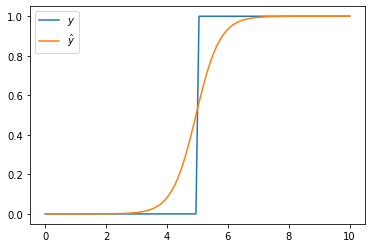

In [15]:
plt.plot(x.numpy(), y.numpy(), label='$y$')
plt.plot(x.numpy(), yhat.detach().numpy(), label='$\hat y$')
plt.legend()
plt.show()

In [16]:
preds = (yhat >= 0.5)
accuracy = (preds == y).sum()
accuracy

tensor(100)

# Neural Nets

In [17]:
def gen_data(size=1000, centers=5):
    M = [np.random.multivariate_normal(np.array([1,0]),.8*np.eye(2)) for i in range(centers)] +\
        [np.random.multivariate_normal(np.array([0,1]),.8*np.eye(2)) for i in range(centers)]
    
    X = np.zeros((size, 2))
    y = np.zeros((size,))
    x1 = []
    x2 = []    
    for j in range(size):
        i = np.random.randint(2*centers)
        m = M[i]
        X[j,:] = np.random.multivariate_normal(np.array(m),.8*np.eye(2)/centers)
        if i<centers:
            y[j] = 0
            x1 += [X[j,:]]
        else:
            y[j] = 1
            x2 += [X[j,:]]
    x1 = np.array(x1).reshape(len(x1),2)
    x2 = np.array(x2).reshape(len(x2),2)
    return X,y,x1,x2

def plot_model(model, X, y, x1, x2):
    xlim_left = np.min(X[:,0])
    xlim_right = np.max(X[:,0])
    ylim_left = np.min(X[:,1])
    ylim_right = np.max(X[:,1])
    xx, yy = np.mgrid[xlim_left-1:xlim_right+1:.01, ylim_left-1:ylim_right+1:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    if model is not None:
        grid = torch.from_numpy(grid).float()
        yhat = model(grid).detach().numpy().reshape(xx.shape)
        ax.contour(xx, yy, yhat, levels=[.5])
    
    ax.scatter(x1[:,0],x1[:,1],marker='.',c='red',label='y=0')
    ax.scatter(x2[:,0],x2[:,1],marker='.',c='blue',label='y=1')
    
    ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
    ax.legend(loc='upper right')
    plt.show()

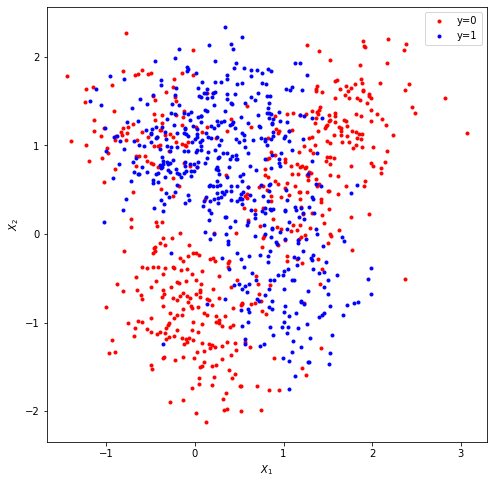

In [18]:
X,y,x1,x2 = gen_data(size=1000, centers=5)
plot_model(None, X, y, x1, x2)

In [19]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4 hidden units

In [20]:
def one_layer_nn(X, y, hidden_size):
    input_size, output_size = X_train.shape[1], y_train.shape[1]
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size),
        nn.Sigmoid()
    )
    return model

In [21]:
model = one_layer_nn(X_train, y_train, 4)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)

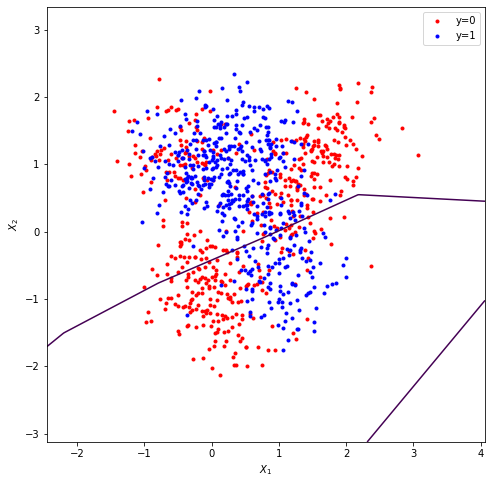

In [22]:
plot_model(model, X.float().numpy(), y.float().numpy(), x1, x2)

In [23]:
def train_model(X, y, model, num_iters=10000, lr=0.001, lr_decay=1, plot_loss=True):
    losses = []
    opt = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.BCELoss()
    for i in range(num_iters):
        yhat = model(X)
        loss = loss_fn(yhat, y)
        losses.append(float(loss))
        opt.zero_grad()
        loss.backward()
        opt.step()
        if i % (num_iters // 10) == 0:
            print(f'iter={i} \t\t loss={round(loss.item(), 5)}')
            opt.param_groups[0]['lr'] = opt.param_groups[0]['lr'] * lr_decay
    print(f'iter={i} \t\t loss={round(loss.item(), 5)}')
    if plot_loss:
        plt.plot(range(num_iters), losses)
    return model

iter=0 		 loss=0.68505
iter=1500 		 loss=0.65617
iter=3000 		 loss=0.65581
iter=4500 		 loss=0.65572
iter=6000 		 loss=0.65569
iter=7500 		 loss=0.65568
iter=9000 		 loss=0.65568
iter=10500 		 loss=0.65568
iter=12000 		 loss=0.65568
iter=13500 		 loss=0.65568
iter=14999 		 loss=0.65568


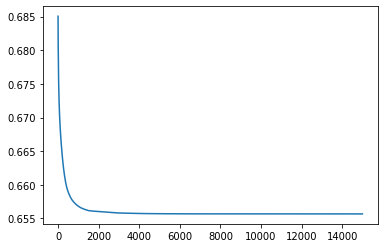

In [24]:
model = train_model(X_train, y_train, model, num_iters=15000, lr=0.1, lr_decay=1/3, plot_loss=True)

train accuracy: 0.6812499761581421
test accuracy: 0.5600000023841858


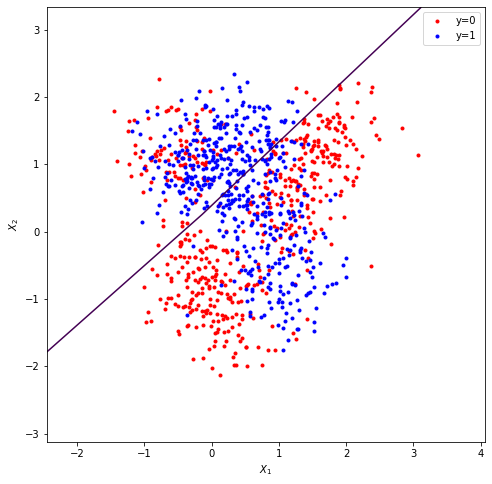

In [25]:
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

## 10 hidden units

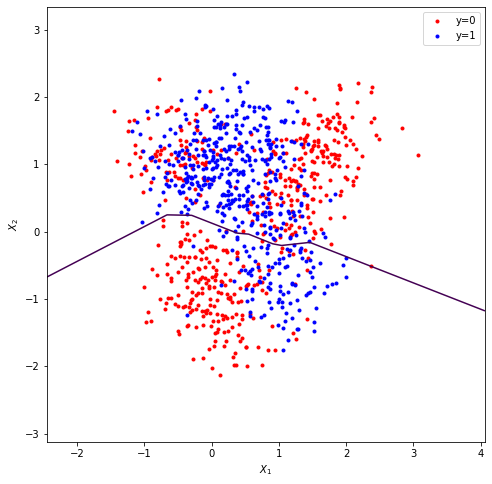

In [26]:
model = one_layer_nn(X_train, y_train, 10)
plot_model(model, X.numpy(), y.numpy(), x1, x2)

iter=0 		 loss=0.67667
iter=1500 		 loss=0.50753
iter=3000 		 loss=0.48289
iter=4500 		 loss=0.47682
iter=6000 		 loss=0.47493
iter=7500 		 loss=0.47432
iter=9000 		 loss=0.47413
iter=10500 		 loss=0.47406
iter=12000 		 loss=0.47404
iter=13500 		 loss=0.47403
iter=14999 		 loss=0.47403


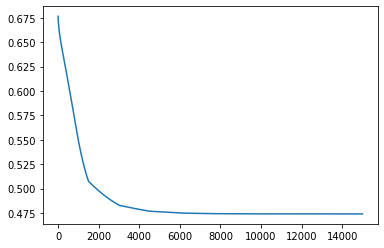

In [27]:
model = train_model(X_train, y_train, model, num_iters=15000, lr=0.1, lr_decay=1/3)

train accuracy: 0.7674999833106995
test accuracy: 0.7799999713897705


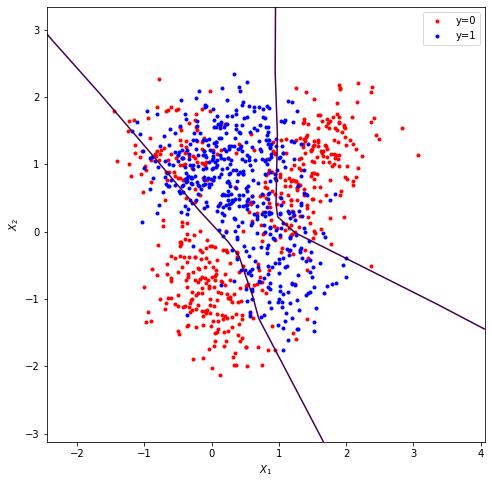

In [28]:
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

## 100 hidden units

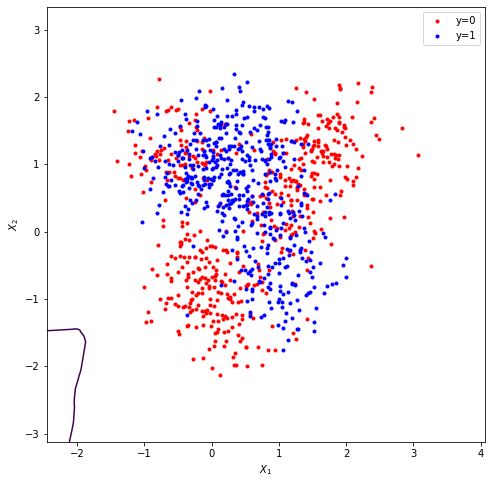

In [29]:
model = one_layer_nn(X_train, y_train, 100)
plot_model(model, X.numpy(), y.numpy(), x1, x2)

iter=0 		 loss=0.70968
iter=2000 		 loss=0.43898
iter=4000 		 loss=0.43134
iter=6000 		 loss=0.4296
iter=8000 		 loss=0.4291
iter=10000 		 loss=0.42894
iter=12000 		 loss=0.42889
iter=14000 		 loss=0.42887
iter=16000 		 loss=0.42887
iter=18000 		 loss=0.42887
iter=19999 		 loss=0.42887


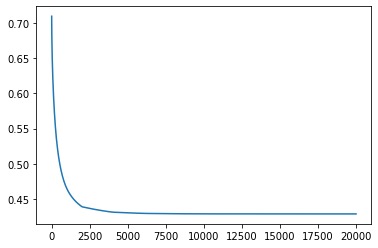

In [30]:
model = train_model(X_train, y_train, model, num_iters=20000, lr=0.1, lr_decay=1/3)

train accuracy: 0.800000011920929
test accuracy: 0.7900000214576721


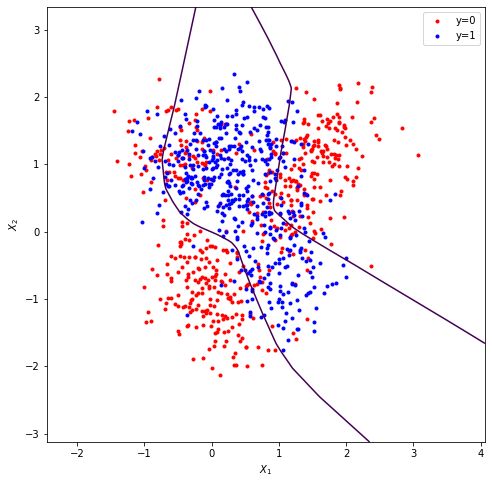

In [31]:
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

## Weight Decay

L2 regularization: $L_R(\theta)=L(\theta) + \frac{\lambda}{2m} ||\theta||_2$

Weight Decay: $\theta \leftarrow \theta - \alpha \big(\nabla L(\theta) + \frac{\lambda}{m} \theta \big)
= \big(1 - \frac{\alpha \lambda}{m} \big) \theta - \alpha \nabla L(\theta)$

Note: L2 reg and weight decay are equivalent when using SGD, but not when including momentum or RMSProp.

In [32]:
model = one_layer_nn(X_train, y_train, 500)
model

Sequential(
  (0): Linear(in_features=2, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=1, bias=True)
  (3): Sigmoid()
)

In [33]:
def train_model(X, y, model, num_iters=10000, lr=0.001, lr_decay=1, plot_loss=True, weight_decay=0):
    losses = []
    opt = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.BCELoss()
    for i in range(num_iters):
        yhat = model(X)
        loss = loss_fn(yhat, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
        if i % (num_iters // 10) == 0:
            print(f'iter={i} \t\t loss={round(loss.item(), 5)}')
            opt.param_groups[0]['lr'] = opt.param_groups[0]['lr'] * lr_decay
    print(f'iter={i} \t\t loss={round(loss.item(), 5)}')
    if plot_loss:
        plt.plot(range(num_iters), losses)
    return model

iter=0 		 loss=0.70724
iter=2000 		 loss=0.49784
iter=4000 		 loss=0.51021
iter=6000 		 loss=0.51381
iter=8000 		 loss=0.51492
iter=10000 		 loss=0.51527
iter=12000 		 loss=0.51539
iter=14000 		 loss=0.51543
iter=16000 		 loss=0.51544
iter=18000 		 loss=0.51545
iter=19999 		 loss=0.51545


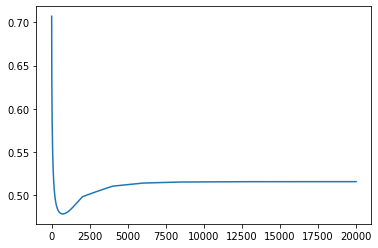

In [34]:
model = train_model(X_train, y_train, model, num_iters=20000, lr=0.1, lr_decay=1/3, weight_decay=0.02)

train accuracy: 0.7562500238418579
test accuracy: 0.7850000262260437


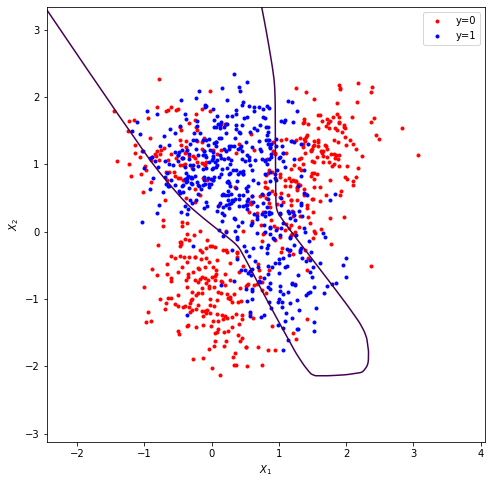

In [35]:
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

# Multilayer Neural Nets

$$a^{[1]} = \sigma_1(W^{[1]}X+b^{[1]})$$
$$\vdots$$
$$a^{[\ell]} = \sigma_{\ell}(W^{[\ell]}a^{[\ell-1]}+b^{[\ell]})$$
$$\vdots$$
$$\hat y = \sigma_L(W^{[L]}a^{[L-1]}+b^{[L]})$$

In [36]:
def multilayer_nn(X, y, hidden_sizes):
    input_size, output_size = X_train.shape[1], y_train.shape[1]
    hidden_sizes = [input_size] + hidden_sizes
    n_layers = len(hidden_sizes)
    model = nn.Sequential()
    for l in range(n_layers-1):
        layer = nn.Sequential(
            nn.Linear(hidden_sizes[l], hidden_sizes[l+1]),
            nn.ReLU()
        )
        model = nn.Sequential(*(list(model) + list(layer)))
    layer = nn.Sequential(
        nn.Linear(hidden_sizes[-1], output_size),
        nn.Sigmoid()
    )
    model = nn.Sequential(*(list(model) + list(layer)))
    return model

In [37]:
model = multilayer_nn(X_train, y_train, [10, 10, 10])
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
  (7): Sigmoid()
)

In [38]:
[params.shape for params in list(model.parameters())]

[torch.Size([10, 2]),
 torch.Size([10]),
 torch.Size([10, 10]),
 torch.Size([10]),
 torch.Size([10, 10]),
 torch.Size([10]),
 torch.Size([1, 10]),
 torch.Size([1])]

iter=0 		 loss=0.72202
iter=2000 		 loss=0.54699
iter=4000 		 loss=0.48423
iter=6000 		 loss=0.47393
iter=8000 		 loss=0.47103
iter=10000 		 loss=0.47014
iter=12000 		 loss=0.46984
iter=14000 		 loss=0.46975
iter=16000 		 loss=0.46971
iter=18000 		 loss=0.4697
iter=19999 		 loss=0.4697


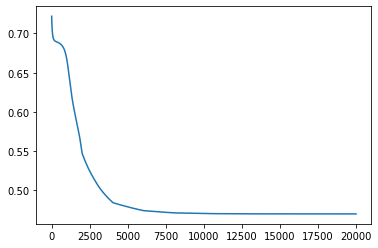

In [39]:
model = train_model(X_train, y_train, model, num_iters=20000, lr=0.1, lr_decay=1/3, weight_decay=0)

train accuracy: 0.7762500047683716
test accuracy: 0.7850000262260437


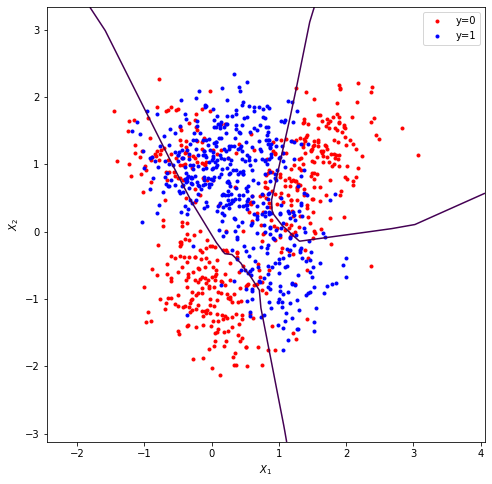

In [40]:
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

## Dropout

In [41]:
def multilayer_nn(X, y, hidden_sizes, dropout=0):
    input_size, output_size = X_train.shape[1], y_train.shape[1]
    hidden_sizes = [input_size] + hidden_sizes
    n_layers = len(hidden_sizes)
    model = nn.Sequential()
    for l in range(n_layers-1):
        layer = nn.Sequential(
            nn.Linear(hidden_sizes[l], hidden_sizes[l+1]),
            nn.Dropout(p=dropout),
            nn.ReLU()
        )
        model = nn.Sequential(*(list(model) + list(layer)))
    layer = nn.Sequential(
        nn.Linear(hidden_sizes[-1], output_size),
        nn.Sigmoid()
    )
    model = nn.Sequential(*(list(model) + list(layer)))
    return model

In [42]:
model = multilayer_nn(X_train, y_train, [100, 100, 100], dropout=0.5)
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=100, out_features=1, bias=True)
  (10): Sigmoid()
)

iter=0 		 loss=0.69934
iter=2000 		 loss=0.4857
iter=4000 		 loss=0.49026
iter=6000 		 loss=0.48232
iter=8000 		 loss=0.46431
iter=10000 		 loss=0.47776
iter=12000 		 loss=0.46778
iter=14000 		 loss=0.48496
iter=16000 		 loss=0.45942
iter=18000 		 loss=0.47559
iter=19999 		 loss=0.45402


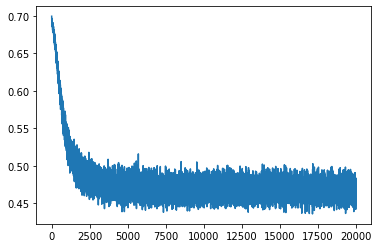

In [43]:
model = train_model(X_train, y_train, model, num_iters=20000, lr=0.1, lr_decay=1/3, weight_decay=0)

train accuracy: 0.7912499904632568
test accuracy: 0.7900000214576721


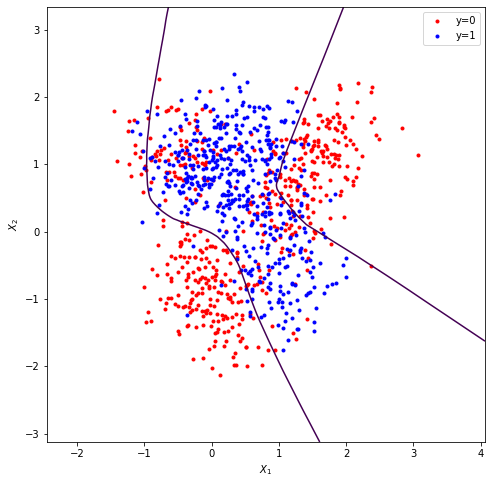

In [44]:
model = model.eval() # must do this for dropout or preds will be random
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

# Batches and Data Loaders

In [91]:
def create_batches(X, y, batch_size):
    # shuffle examples
    idx = torch.randperm(len(X))
    X = X[idx]
    y = y[idx]
    # batch examples
    n_batches = len(y) // batch_size
    batches = []
    for t in range(n_batches):
        X_t = X[t*batch_size : (t+1)*batch_size, :]
        y_t = y[t*batch_size : (t+1)*batch_size, :]
        batches.append((X_t, y_t))
    leftover = len(y) - n_batches * batch_size
    if leftover > 0:
        X_t = X[n_batches * batch_size:, :]
        y_t = y[n_batches * batch_size:, :]
        batches.append((X_t, y_t))
    return batches

def train_model(X, y, model, num_epochs=1000, lr=0.001, lr_decay=1, plot_loss=True, weight_decay=0,
               batch_size=len(y)):
    losses = []
    opt = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.BCELoss()
    batches = create_batches(X, y, batch_size)
    for i in tqdm(range(num_epochs)):
        batch_losses = []
        for X, y in batches:
            yhat = model(X)
            loss = loss_fn(yhat, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            batch_losses.append(float(loss))
        loss = sum(batch_losses) / len(batch_losses)
        losses.append(loss)
        if i % (num_epochs // 10) == 0:
            print(f'epoch={i} \t\t loss={round(loss, 5)}')
            opt.param_groups[0]['lr'] = opt.param_groups[0]['lr'] * lr_decay
    print(f'epoch={i} \t\t\t loss={round(loss, 5)}')
    if plot_loss:
        plt.plot(range(len(losses)), losses)
    return model

In [92]:
model = multilayer_nn(X_train, y_train, [100])
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
)

  0%|          | 0/10000 [00:00<?, ?it/s]

epoch=0 		 loss=0.67788
epoch=1000 		 loss=0.41286
epoch=2000 		 loss=0.40836
epoch=3000 		 loss=0.40705
epoch=4000 		 loss=0.40662
epoch=5000 		 loss=0.40649
epoch=6000 		 loss=0.40644
epoch=7000 		 loss=0.40642
epoch=8000 		 loss=0.40642
epoch=9000 		 loss=0.40642
epoch=9999 			 loss=0.40642


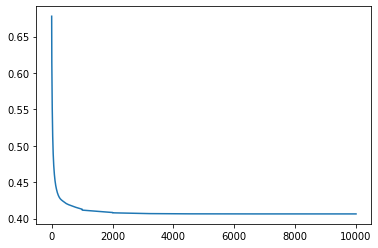

In [93]:
model = train_model(X_train, y_train, model, num_epochs=10000, lr=0.1, lr_decay=1/3, weight_decay=0, batch_size=64)

train accuracy: 0.8037499785423279
test accuracy: 0.800000011920929


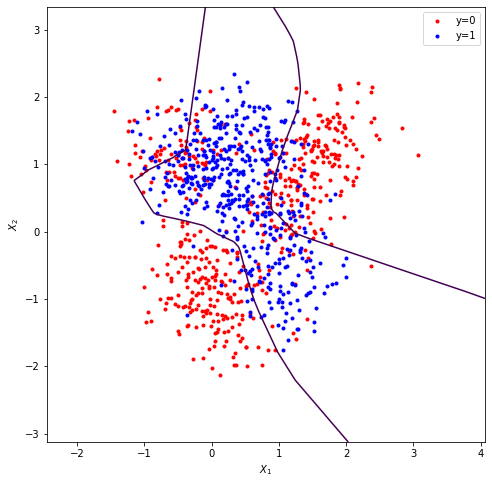

In [94]:
model = model.eval()
y_pred_train = (model(X_train) >= 0.5)
y_pred_test = (model(X_test) >= 0.5)
print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
plot_model(model, X.numpy(), y.numpy(), x1, x2)

In [96]:
class Dataset(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_data = Dataset(X_train, y_train)
test_data = Dataset(X_test, y_test)

In [102]:
train_data = [(X_train[idx], y_train[idx]) for idx in range(len(y_train))]
test_data = [(X_test[idx], y_test[idx]) for idx in range(len(y_test))]

In [105]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=2, shuffle=True)

In [106]:
next(iter(train_dataloader))

[tensor([[-0.0643,  0.3829],
         [ 1.8067,  1.6951]]),
 tensor([[1.],
         [0.]])]

In [107]:
def train_model(train_data, model, num_epochs=1000, lr=0.001, lr_decay=1, plot_loss=True, weight_decay=0,
               batch_size=len(y)):
    losses = []
    opt = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.BCELoss()
    data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    for i in tqdm(range(num_epochs)):
        batch_losses = []
        for X, y in data_loader:
            opt.zero_grad()
            yhat = model(X)
            loss = loss_fn(yhat, y)
            loss.backward()
            opt.step()
            batch_losses.append(float(loss))
        loss = sum(batch_losses) / len(batch_losses)
        losses.append(loss)
        if i % (num_epochs // 10) == 0:
            print(f'epoch={i} \t\t loss={round(loss, 5)}')
            opt.param_groups[0]['lr'] = opt.param_groups[0]['lr'] * lr_decay
    print(f'epoch={i} \t\t\t loss={round(loss, 5)}')
    if plot_loss:
        plt.plot(range(len(losses)), losses)
    return model

In [108]:
model = multilayer_nn(X_train, y_train, [100])
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
)

  0%|          | 0/10000 [00:00<?, ?it/s]

epoch=0 		 loss=0.65232
epoch=1000 		 loss=0.40918
epoch=2000 		 loss=0.4012
epoch=3000 		 loss=0.40293
epoch=4000 		 loss=0.40122
epoch=5000 		 loss=0.403
epoch=6000 		 loss=0.40678
epoch=7000 		 loss=0.40406
epoch=8000 		 loss=0.40363
epoch=9000 		 loss=0.40859
epoch=9999 			 loss=0.4012


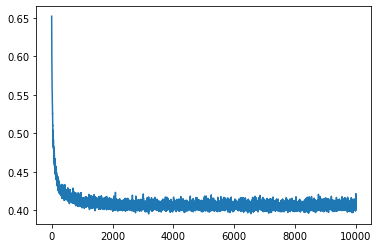

In [110]:
model = train_model(train_data, model, num_epochs=10000, lr=0.1, lr_decay=1/3, weight_decay=0, batch_size=64)

In [112]:
def eval_model(model, X_train, y_train, X_test, y_test):
    model = model.eval()
    y_pred_train = (model(X_train) >= 0.5)
    y_pred_test = (model(X_test) >= 0.5)
    print(f'train accuracy: {(y_pred_train == y_train).sum() / len(y_train)}')
    print(f'test accuracy: {(y_pred_test == y_test).sum() / len(y_test)}')
    plot_model(model, X.numpy(), y.numpy(), x1, x2)

train accuracy: 0.7962499856948853
test accuracy: 0.7950000166893005


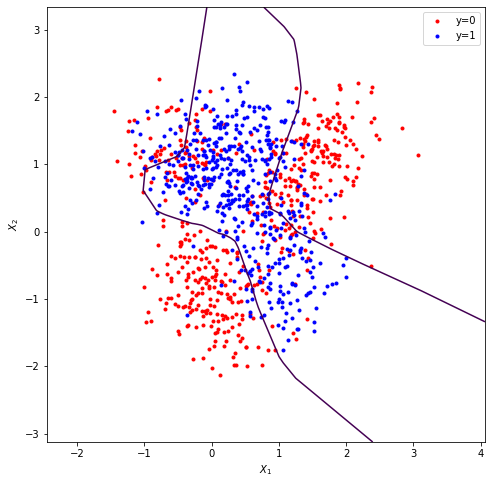

In [113]:
eval_model(model, X_train, y_train, X_test, y_test)

# Optimizers

Gradient Descent: $\theta \leftarrow \theta - \alpha \nabla L(\theta)$

Weight Decay: $\theta \leftarrow \theta - \alpha (\nabla L(\theta) + \lambda \theta)$

Exponentially Weighted Moving Averages (EWMA, IIR filter):
- Recursive: $v_t = \beta v_{t-1} + (1-\beta) \theta_t$
- Expanded: $v_t = (1-\beta) (\theta_t + \beta \theta_{t-1} + \beta^2 \theta_{t-2} + \dots)$
- Bias correction: $v_t \leftarrow \frac{v_t}{1-\beta^t}$
- Number of points in window: $n \approx \frac{1}{1-\beta}$

Momentum: Gradient exponential smoothing
$$v_t = \beta v_{t-1} + (1-\beta) \nabla L(\theta_t)$$
$$\theta_{t+1} = \theta_t - \alpha v_t$$

RMSProp: Gradiant variance dampening
$$s_t = \beta s_{t-1} + (1-\beta) (\nabla L(\theta_t))^2$$
$$\theta_{t+1} = \theta_t - \alpha \frac{\nabla L(\theta_t)}{\sqrt{s_t} + \varepsilon}$$

Adam: Momentum + RMSProp
$$v_t = \beta_1 v_{t-1} + (1-\beta_1) \nabla L(\theta_t)$$
$$\tilde{v_t} = \frac{v_t}{1-\beta_1^t}$$
$$s_t = \beta_2 s_{t-1} + (1-\beta_2) (\nabla L(\theta_t))^2$$
$$\tilde{s_t} = \frac{s_t}{1-\beta_2^t}$$
$$\theta_{t+1} = \theta_t - \alpha \frac{\tilde{v_t}}{\sqrt{\tilde{s_t}} + \varepsilon}$$

In [114]:
def get_optimizer(model, optimizer='sgd', lr=0.001, weight_decay=0, momentum=0, betas=(0.9, 0.999), eps=1e-8):
    if optimizer == 'sgd':
        opt = torch.optim.SGD(
            model.parameters(),
            lr=lr, 
            weight_decay=weight_decay, 
            momentum=momentum
        )
    if optimizer == 'adam':
        opt = torch.optim.Adam(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
            betas=betas,
            eps=eps
        )
    return opt

def train_model(train_data, model, opt, num_epochs=1000, lr_decay=1, plot_loss=True, batch_size=len(y)):
    losses = []
    loss_fn = nn.BCELoss()
    data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    for i in tqdm(range(num_epochs)):
        batch_losses = []
        for X, y in data_loader:
            opt.zero_grad()
            yhat = model(X)
            loss = loss_fn(yhat, y)
            loss.backward()
            opt.step()
            batch_losses.append(float(loss))
        avg_loss = sum(batch_losses) / len(batch_losses)
        losses.append(avg_loss)
        if i % (num_epochs // 10) == 0:
            print(f'epoch={i} \t\t loss={round(avg_loss, 5)}')
            opt.param_groups[0]['lr'] = opt.param_groups[0]['lr'] * lr_decay
    print(f'epoch={i} \t\t\t loss={round(avg_loss, 5)}')
    if plot_loss:
        plt.plot(range(len(losses)), losses)
    return model

In [115]:
model = multilayer_nn(X_train, y_train, [100])
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
)

  0%|          | 0/10000 [00:00<?, ?it/s]

epoch=0 		 loss=0.49797
epoch=1000 		 loss=0.42929
epoch=2000 		 loss=0.40998
epoch=3000 		 loss=0.40307
epoch=4000 		 loss=0.39532
epoch=5000 		 loss=0.38991
epoch=6000 		 loss=0.39866
epoch=7000 		 loss=0.38272
epoch=8000 		 loss=0.39404
epoch=9000 		 loss=0.42673
epoch=9999 			 loss=0.40083


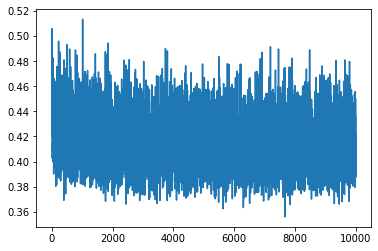

In [120]:
opt = get_optimizer(model, optimizer='adam', lr=0.1, weight_decay=0.001, betas=(0.9, 0.999), eps=1e-8)
model = train_model(train_data, model, opt, num_epochs=10000, lr_decay=1/3, batch_size=256)

train accuracy: 0.800000011920929
test accuracy: 0.8050000071525574


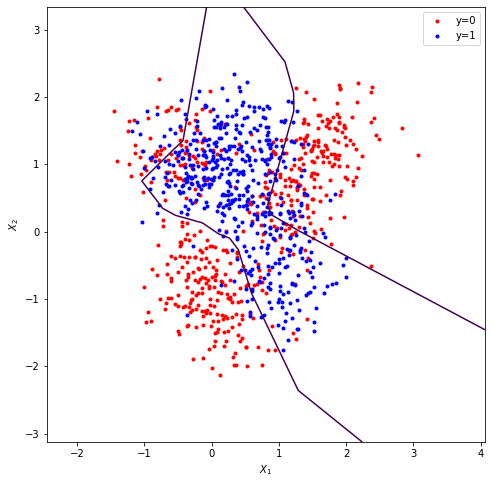

In [121]:
eval_model(model, X_train, y_train, X_test, y_test)

# Hyperparameter Tuning

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.67634
epoch=100 		 loss=0.63929
epoch=200 		 loss=0.60917
epoch=300 		 loss=0.55694
epoch=400 		 loss=0.53681
epoch=500 		 loss=0.53036
epoch=600 		 loss=0.4961
epoch=700 		 loss=0.47759
epoch=800 		 loss=0.46459
epoch=900 		 loss=0.45363
epoch=999 			 loss=0.45987


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.70792
epoch=100 		 loss=0.64548
epoch=200 		 loss=0.6282
epoch=300 		 loss=0.56863
epoch=400 		 loss=0.55569
epoch=500 		 loss=0.50806
epoch=600 		 loss=0.5203
epoch=700 		 loss=0.50128
epoch=800 		 loss=0.48285
epoch=900 		 loss=0.4665
epoch=999 			 loss=0.47981


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.72135
epoch=100 		 loss=0.65409
epoch=200 		 loss=0.62415
epoch=300 		 loss=0.58928
epoch=400 		 loss=0.56675
epoch=500 		 loss=0.54676
epoch=600 		 loss=0.54332
epoch=700 		 loss=0.53396
epoch=800 		 loss=0.53618
epoch=900 		 loss=0.53553
epoch=999 			 loss=0.52625


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.67617
epoch=100 		 loss=0.64819
epoch=200 		 loss=0.64813
epoch=300 		 loss=0.63694
epoch=400 		 loss=0.6391
epoch=500 		 loss=0.62685
epoch=600 		 loss=0.62965
epoch=700 		 loss=0.6316
epoch=800 		 loss=0.63482
epoch=900 		 loss=0.64562
epoch=999 			 loss=0.64557


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.68933
epoch=100 		 loss=0.48331
epoch=200 		 loss=0.44338
epoch=300 		 loss=0.43593
epoch=400 		 loss=0.41565
epoch=500 		 loss=0.42827
epoch=600 		 loss=0.41648
epoch=700 		 loss=0.41964
epoch=800 		 loss=0.41829
epoch=900 		 loss=0.40232
epoch=999 			 loss=0.43127


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.67594
epoch=100 		 loss=0.43602
epoch=200 		 loss=0.4439
epoch=300 		 loss=0.44268
epoch=400 		 loss=0.41912
epoch=500 		 loss=0.43142
epoch=600 		 loss=0.37386
epoch=700 		 loss=0.40063
epoch=800 		 loss=0.41886
epoch=900 		 loss=0.42898
epoch=999 			 loss=0.42571


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.72339
epoch=100 		 loss=0.54152
epoch=200 		 loss=0.48757
epoch=300 		 loss=0.46729
epoch=400 		 loss=0.48392
epoch=500 		 loss=0.48349
epoch=600 		 loss=0.4893
epoch=700 		 loss=0.49935
epoch=800 		 loss=0.48731
epoch=900 		 loss=0.48594
epoch=999 			 loss=0.50616


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.67201
epoch=100 		 loss=0.63402
epoch=200 		 loss=0.65995
epoch=300 		 loss=0.68318
epoch=400 		 loss=0.6871
epoch=500 		 loss=0.6901
epoch=600 		 loss=0.68818
epoch=700 		 loss=0.69318
epoch=800 		 loss=0.69246
epoch=900 		 loss=0.69361
epoch=999 			 loss=0.68766


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.62101
epoch=100 		 loss=0.38896
epoch=200 		 loss=0.39706
epoch=300 		 loss=0.40832
epoch=400 		 loss=0.41338
epoch=500 		 loss=0.39639
epoch=600 		 loss=0.38642
epoch=700 		 loss=0.41042
epoch=800 		 loss=0.37569
epoch=900 		 loss=0.38
epoch=999 			 loss=0.41341


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.679
epoch=100 		 loss=0.43154
epoch=200 		 loss=0.43512
epoch=300 		 loss=0.44515
epoch=400 		 loss=0.434
epoch=500 		 loss=0.4047
epoch=600 		 loss=0.41785
epoch=700 		 loss=0.43065
epoch=800 		 loss=0.41619
epoch=900 		 loss=0.4062
epoch=999 			 loss=0.40228


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.68491
epoch=100 		 loss=0.49262
epoch=200 		 loss=0.4958
epoch=300 		 loss=0.48817
epoch=400 		 loss=0.51454
epoch=500 		 loss=0.50221
epoch=600 		 loss=0.5194
epoch=700 		 loss=0.49227
epoch=800 		 loss=0.4864
epoch=900 		 loss=0.49228
epoch=999 			 loss=0.49128


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.69435
epoch=100 		 loss=0.69037
epoch=200 		 loss=0.69335
epoch=300 		 loss=0.6904
epoch=400 		 loss=0.69141
epoch=500 		 loss=0.69394
epoch=600 		 loss=0.69389
epoch=700 		 loss=0.69137
epoch=800 		 loss=0.69335
epoch=900 		 loss=0.68793
epoch=999 			 loss=0.69137


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.71179
epoch=100 		 loss=0.47139
epoch=200 		 loss=0.45461
epoch=300 		 loss=0.43792
epoch=400 		 loss=0.43722
epoch=500 		 loss=0.3981
epoch=600 		 loss=0.42581
epoch=700 		 loss=0.42771
epoch=800 		 loss=0.45416
epoch=900 		 loss=0.41818
epoch=999 			 loss=0.37475


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.72102
epoch=100 		 loss=0.43282
epoch=200 		 loss=0.47864
epoch=300 		 loss=0.41056
epoch=400 		 loss=0.42919
epoch=500 		 loss=0.44758
epoch=600 		 loss=0.46309
epoch=700 		 loss=0.41608
epoch=800 		 loss=0.4532
epoch=900 		 loss=0.45282
epoch=999 			 loss=0.42322


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.72969
epoch=100 		 loss=0.48839
epoch=200 		 loss=0.47465
epoch=300 		 loss=0.49898
epoch=400 		 loss=0.4848
epoch=500 		 loss=0.53301
epoch=600 		 loss=0.50776
epoch=700 		 loss=0.52281
epoch=800 		 loss=0.51856
epoch=900 		 loss=0.49902
epoch=999 			 loss=0.51258


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch=0 		 loss=0.65983
epoch=100 		 loss=0.69377
epoch=200 		 loss=0.68953
epoch=300 		 loss=0.69009
epoch=400 		 loss=0.69278
epoch=500 		 loss=0.68385
epoch=600 		 loss=0.68851
epoch=700 		 loss=0.69324
epoch=800 		 loss=0.68605
epoch=900 		 loss=0.68932
epoch=999 			 loss=0.69285
{(0.0001, 0.0001): (Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
), tensor(0.7800)), (0.0001, 0.001): (Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
), tensor(0.7850)), (0.0001, 0.01): (Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Dropout(p=0, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
  (4): Sigmoid()
), tensor(0.7750)), (0.0001, 0.1): (Se

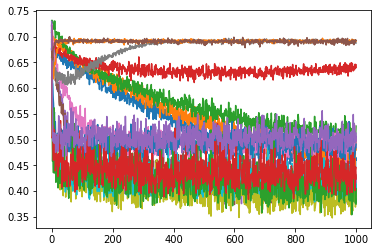

In [127]:
# specify hparams
lrs = np.logspace(-4, -1, num=4)
weight_decays = np.logspace(-4, -1, num=4)
results = {}
# search over hparams and train diff models and eval each on test set
for lr in lrs:
    for weight_decay in weight_decays:
        model = multilayer_nn(X_train, y_train, [100])
        opt = get_optimizer(model, optimizer='adam', lr=lr, weight_decay=weight_decay, betas=(0.9, 0.999), eps=1e-8)
        model = train_model(train_data, model, opt, num_epochs=1000, lr_decay=1, batch_size=256)
        model.eval()
        y_pred = (model(X_test) >= 0.5)
        accuracy = (y_pred == y_test).sum() / len(y_test)
        results[(lr, weight_decay)] = (model, accuracy)

In [135]:
print([(key, round(float(val[1]), 4)) for key,val in results.items()])

[((0.0001, 0.0001), 0.78), ((0.0001, 0.001), 0.785), ((0.0001, 0.01), 0.775), ((0.0001, 0.1), 0.6), ((0.001, 0.0001), 0.795), ((0.001, 0.001), 0.785), ((0.001, 0.01), 0.765), ((0.001, 0.1), 0.43), ((0.01, 0.0001), 0.775), ((0.01, 0.001), 0.79), ((0.01, 0.01), 0.78), ((0.01, 0.1), 0.43), ((0.1, 0.0001), 0.785), ((0.1, 0.001), 0.78), ((0.1, 0.01), 0.735), ((0.1, 0.1), 0.43)]


train accuracy: 0.7962499856948853
test accuracy: 0.7950000166893005


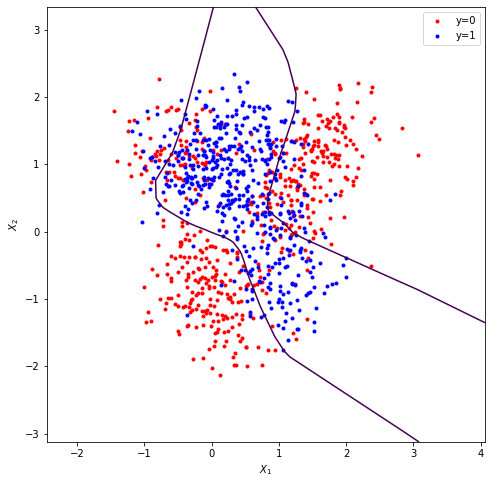

In [146]:
best_model = results[(0.001, 0.0001)][0]
eval_model(best_model, X_train, y_train, X_test, y_test)

# Batch Normalization

Idea: 
- Normalization: Just like normalizing the input features makes training easier, doing so for each activation should as well for deeper networks.
- Covariate Shift: For any given layer, it somewhat decouples the dependence of later layer params from earlier layer params, in a sense letting each layer's weights be learned somewhat independently of each other. Batch norm keeps the given layer from shifting "too much" (in the sense that mean and std dev are preserved).
- Regularization: Batch norm adds a slight regularization effect, since normalizing makes each layer's activations somewhat more stochastic due to the stochastic estimates of mean and variance. In this sense, batch norm has a similar noise effect to dropout. This effect depends on the batch size, with larger batch sizes experiencing less regularization from batch norm.

For each layer $l=0,\dots,L$ with input activation tensor $Z \equiv Z^{[l]} = [z^{(1)}, \dots, z^{(m)}]$:
- Calculate mean vector: $\mu = \frac{1}{m} \sum_i z^{(i)}$
- Calculate variance vector: $\sigma^2 = \frac{1}{m} \sum_i (z^{(i)} - \mu)^2$
- Normalize input activation tensors (with some small smoother $\varepsilon$): $\hat Z = \frac{(Z - \mu)}{\sqrt{\sigma^2+\varepsilon}}$
- Allow for more general distributions by using two learned params $\gamma$ and $\beta$: $\tilde Z = \gamma \hat Z + \beta$
- Calculate output activation with normalized input: $A = \sigma(\tilde Z)$

Notes:
- Can include smoother estimates of $\mu$ and $\sigma^2$ by using a momentum parameter.
- Zeroing $Z$ means we no longer need the bias vector $b$ and can just use $\beta$ as a proxy for it.
- Batch norm is done on batches, meaning each mean and variance is different. At test time, it's typical to use an exponentially smoothed average of the means and variances as a proxy of the "true" mean and variance per layer on the entire training set. These are then used for inference.

In [156]:
def multilayer_nn(input_size, output_size, hidden_sizes, dropout=0):
    hidden_sizes = [input_size] + hidden_sizes
    n_layers = len(hidden_sizes)
    model = nn.Sequential()
    for l in range(n_layers-1):
        layer = nn.Sequential(
            nn.Linear(hidden_sizes[l], hidden_sizes[l+1]),
            nn.BatchNorm1d(hidden_sizes[l+1]),
            nn.ReLU(),
            nn.Dropout(p=dropout),
        )
        model = nn.Sequential(*([model] + [layer]))
    layer = nn.Sequential(
        nn.Linear(hidden_sizes[-1], output_size),
        nn.BatchNorm1d(output_size),
        nn.Sigmoid()
    )
    model = nn.Sequential(*([model] + [layer]))
    return model

In [168]:
input_size, output_size = X_train.shape[1], y_train.shape[1]
model = multilayer_nn(input_size, output_size, [10]*10, dropout=0)
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0, inplace=False)
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0, inplace=False)
  (8): Linear(in_features=10, out_features=10, bias=True)
  (9): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0, inplace=False)
  (12): Linear(in_features=10, out_features=10, bias=True)
  (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Dropout(p=0, inplace=False)
  (16): Linear(in_features=10, out_features=10, bias=True)
  (17): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (18): ReLU()
  (19): Dropout(p=0, inplace=False)
  (20): L

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch=0 		 loss=0.72866
epoch=200 		 loss=0.45074
epoch=400 		 loss=0.41937
epoch=600 		 loss=0.4759
epoch=800 		 loss=0.3995
epoch=1000 		 loss=0.45492
epoch=1200 		 loss=0.47055
epoch=1400 		 loss=0.43287
epoch=1600 		 loss=0.40096
epoch=1800 		 loss=0.59893
epoch=1999 			 loss=0.49896


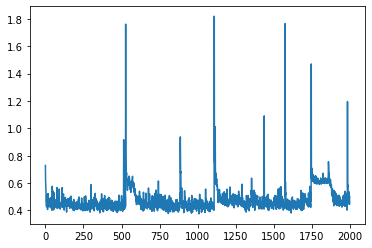

In [169]:
opt = get_optimizer(model, optimizer='adam', lr=0.1, weight_decay=0.0001, betas=(0.9, 0.999), eps=1e-8)
model = train_model(train_data, model, opt, num_epochs=2000, lr_decay=1, batch_size=256)

train accuracy: 0.7737500071525574
test accuracy: 0.7599999904632568


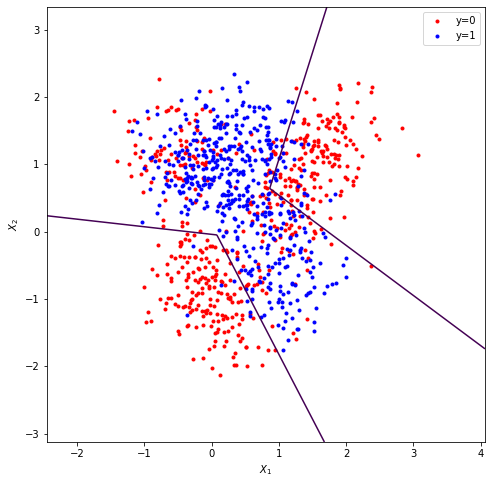

In [170]:
eval_model(model, X_train, y_train, X_test, y_test)

# Multiclass Classification

$$\hat y_i = p(y=i|X) = \frac{e^{Wz_i+b}}{\sum_j e^{Wz_j+b}}, i = 1, \dots, k$$
$$L(\theta) = -\frac{1}{m} \sum_i \sum_k y_i \log(\hat y_i)$$

In [171]:
t = np.exp([5, -1, 0, 3])
Z = t.sum()
yhat = t / Z
yhat

array([0.87370431, 0.0021657 , 0.00588697, 0.11824302])

In [374]:
def plot_model(model, X, y):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    fig, ax = plt.subplots(figsize=(8, 8))


    classes = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))
    if model is not None:
        grid = torch.from_numpy(grid).float()
        yhat = model(grid).argmax(dim=1).detach().numpy().reshape(xx.shape)
        ax.contourf(xx, yy, yhat, alpha=0.2, cmap=plt.cm.rainbow)
        plt.axis("tight")

    for i, color in zip(classes, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            color=color,
            label=i,
            #cmap=plt.cm.Paired,
            edgecolor="black",
            s=20,
            alpha=0.7
        )
    plt.title("Decision Surface")
    plt.axis("tight")

    ax.set(aspect="equal", xlabel="$x_1$", ylabel="$x_2$")
    ax.legend(loc='upper right')
    plt.show()

In [375]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, 
                           random_state=seed)
X.shape, y.shape

((1000, 2), (1000,))

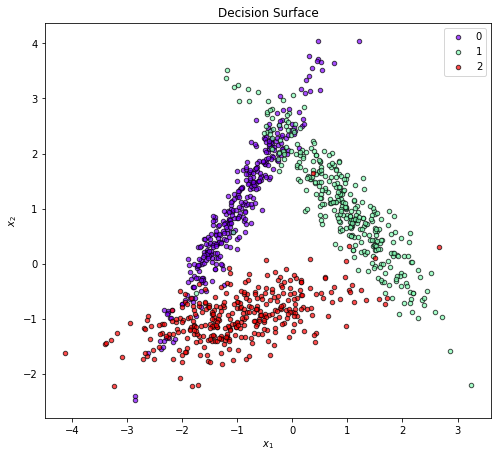

In [376]:
plot_model(None, X, y)

In [221]:
# convert y=0,1,2 to one-hot 100, 010, 001
# update: not needed for cross entropy loss in pytorch
# encoder = OneHotEncoder()
# Y = encoder.fit_transform(y.reshape(-1,1)).todense()
# y = encoder.inverse_transform(Y).flatten()
# Y.shape

(1000, 3)

In [377]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()
n_features = len(X.T)
n_classes = len(torch.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [378]:
input_size, output_size = n_features, n_classes
model = nn.Sequential(
    nn.Linear(input_size, output_size)
    # no need to include nn.Softmax with nn.CrossEntropyLoss
    # if using nn.NNLLoss, need an nn.LogSoftmax layer here instead
)
model

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
)

In [379]:
def train_model(train_data, model, opt, loss_fn, num_epochs=1000, lr_decay=1, plot_loss=True, batch_size=len(y)):
    losses = []
    # loss_fn = nn.CrossEntropyLoss()
    data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    for i in tqdm(range(num_epochs)):
        batch_losses = []
        for X, y in data_loader:
            opt.zero_grad()
            yhat = model(X)
            loss = loss_fn(yhat, y)
            loss.backward()
            opt.step()
            batch_losses.append(float(loss))
        avg_loss = sum(batch_losses) / len(batch_losses)
        losses.append(avg_loss)
        if i % (num_epochs // 10) == 0:
            print(f'epoch={i} \t\t loss={round(avg_loss, 5)}')
            opt.param_groups[0]['lr'] = opt.param_groups[0]['lr'] * lr_decay
    print(f'epoch={i} \t\t\t loss={round(avg_loss, 5)}')
    if plot_loss:
        plt.plot(range(len(losses)), losses)
    return model

In [380]:
loss_fn = nn.CrossEntropyLoss()
logits = model(X)
yhat = logits.softmax(dim=1)
loss = loss_fn(logits, y)
loss, yhat[:10]

(tensor(1.1978, grad_fn=<NllLossBackward0>),
 tensor([[0.6639, 0.2141, 0.1220],
         [0.6562, 0.2247, 0.1191],
         [0.5516, 0.2878, 0.1606],
         [0.2647, 0.5298, 0.2055],
         [0.6509, 0.2339, 0.1152],
         [0.7133, 0.1866, 0.1000],
         [0.2861, 0.4825, 0.2314],
         [0.4571, 0.4177, 0.1252],
         [0.7899, 0.1491, 0.0610],
         [0.6064, 0.2555, 0.1380]], grad_fn=<SliceBackward0>))

In [381]:
train_data = [(X_train[idx], y_train[idx]) for idx in range(len(y_train))]
test_data = [(X_test[idx], y_test[idx]) for idx in range(len(y_test))]
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=2, shuffle=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch=0 		 loss=0.9589
epoch=200 		 loss=0.35784
epoch=400 		 loss=0.35061
epoch=600 		 loss=0.29306
epoch=800 		 loss=0.29944
epoch=1000 		 loss=0.32556
epoch=1200 		 loss=0.40829
epoch=1400 		 loss=0.29986
epoch=1600 		 loss=0.32863
epoch=1800 		 loss=0.32935
epoch=1999 			 loss=0.35484


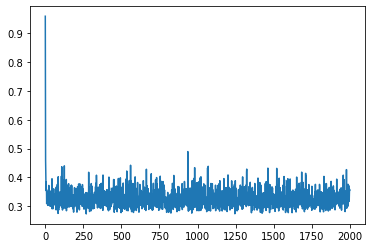

In [382]:
loss_fn = nn.CrossEntropyLoss()
opt = get_optimizer(model, optimizer='adam', lr=0.1, weight_decay=0.0001, betas=(0.9, 0.999), eps=1e-8)
model = train_model(train_data, model, opt, loss_fn, num_epochs=2000, lr_decay=1, batch_size=256)

In [383]:
def eval_model(model, X, y, X_train, y_train, X_test, y_test):
    model = model.eval()
    y_pred_train = model(X_train).argmax(dim=1)
    y_pred_test = model(X_test).argmax(dim=1)
    acc_train = (y_pred_train == y_train).sum() / len(y_train)
    acc_test = (y_pred_test == y_test).sum() / len(y_test)
    print(f'train accuracy: {acc_train}')
    print(f'test accuracy: {acc_test}')
    plot_model(model, X.numpy(), y.numpy())

train accuracy: 0.8799999952316284
test accuracy: 0.8700000047683716


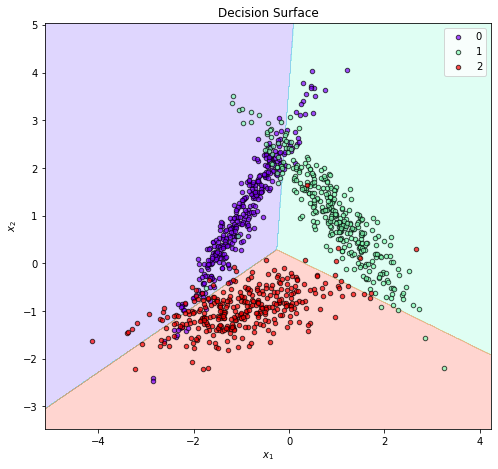

In [384]:
eval_model(model, X, y, X_train, y_train, X_test, y_test)

In [385]:
def multilayer_nn(input_size, output_size, hidden_sizes, dropout=0):
    hidden_sizes = [input_size] + hidden_sizes
    n_layers = len(hidden_sizes)
    model = nn.Sequential()
    for l in range(n_layers-1):
        layer = nn.Sequential(
            nn.Linear(hidden_sizes[l], hidden_sizes[l+1]),
            nn.BatchNorm1d(hidden_sizes[l+1]),
            nn.ReLU(),
            nn.Dropout(p=dropout),
        )
        model = nn.Sequential(*([model] + [layer]))
    layer = nn.Sequential(
        nn.Linear(hidden_sizes[-1], output_size)
    )
    model = nn.Sequential(*([model] + [layer]))
    return model

In [387]:
model = multilayer_nn(input_size, output_size, [100], dropout=0)
model

Sequential(
  (0): Sequential(
    (0): Sequential()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=100, bias=True)
      (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0, inplace=False)
    )
  )
  (1): Sequential(
    (0): Linear(in_features=100, out_features=3, bias=True)
  )
)

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch=0 		 loss=0.67709
epoch=200 		 loss=0.25715
epoch=400 		 loss=0.18666
epoch=600 		 loss=0.246
epoch=800 		 loss=0.30817
epoch=1000 		 loss=0.19709
epoch=1200 		 loss=0.19216
epoch=1400 		 loss=0.1894
epoch=1600 		 loss=0.21491
epoch=1800 		 loss=0.28587
epoch=1999 			 loss=0.31034


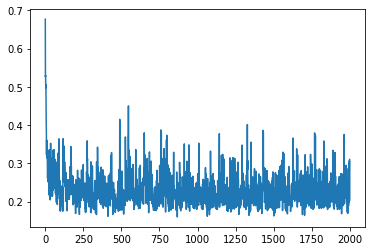

In [388]:
loss_fn = nn.CrossEntropyLoss()
opt = get_optimizer(model, optimizer='adam', lr=0.1, weight_decay=0.0001, betas=(0.9, 0.999), eps=1e-8)
model = train_model(train_data, model, opt, loss_fn, num_epochs=2000, lr_decay=1, batch_size=256)

train accuracy: 0.9162499904632568
test accuracy: 0.9150000214576721


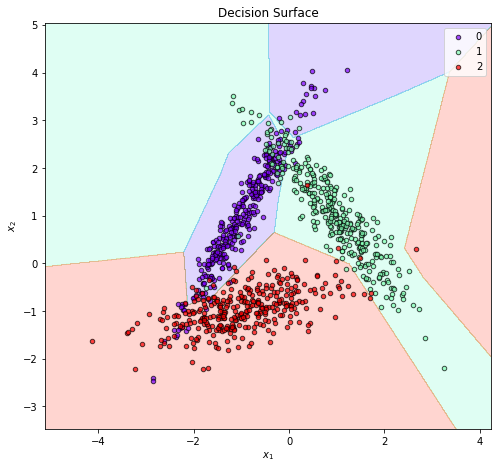

In [389]:
eval_model(model, X, y, X_train, y_train, X_test, y_test)

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch=0 		 loss=1.0855
epoch=200 		 loss=0.21464
epoch=400 		 loss=0.2643
epoch=600 		 loss=0.26047
epoch=800 		 loss=0.23568
epoch=1000 		 loss=0.20862
epoch=1200 		 loss=0.22422
epoch=1400 		 loss=0.28434
epoch=1600 		 loss=0.26158
epoch=1800 		 loss=0.29054
epoch=1999 			 loss=0.26333


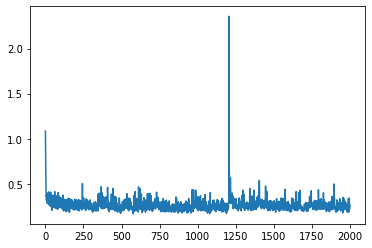

In [393]:
model = multilayer_nn(input_size, output_size, [10]*10, dropout=0)
loss_fn = nn.CrossEntropyLoss()
opt = get_optimizer(model, optimizer='adam', lr=0.1, weight_decay=0.0001, betas=(0.9, 0.999), eps=1e-8)
model = train_model(train_data, model, opt, loss_fn, num_epochs=2000, lr_decay=1, batch_size=256)

train accuracy: 0.8974999785423279
test accuracy: 0.9200000166893005


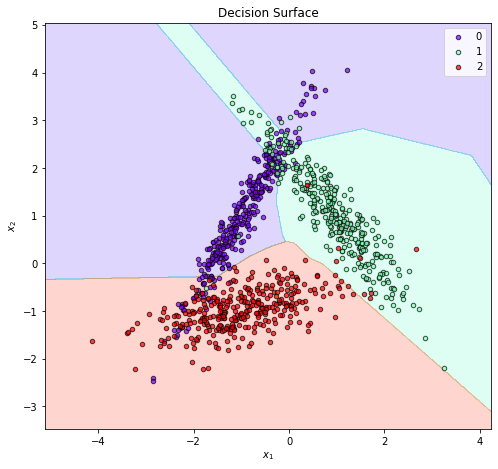

In [394]:
eval_model(model, X, y, X_train, y_train, X_test, y_test)

# General DL Tips and Tricks

Order of progression:
1. Try to do well on the training set, e.g. using a bigger network or better optimizer.
2. Try to do well on the validation set, e.g. using regularization or collecting more training data.
3. Try to do well on the test set, e.g. by collecting a bigger validation set
4. Try to do well on the end-user application, e.g. using a different loss function or validation/test sets.

Metrics to keep track of:
- Human level performance
- Training set performance
- Validation set performance
- Train validation set performance (if training and val/test sets have mismatched distributions)
- Test set performance (if in a production setting)
- Irreducible bias: human level performance - train performance
- Avoidable bias: train performance - val performance
- Variance: val performance - test performance
- Distribution mismatch: train val performance - val performance
- Production mismatch: val performance - test performance

Multilabel Classification: Given an input $x$, predict the set of labels $y_1,\cdots,y_s$ present for $x$.
- Instead of a softmax, use a vectorized sigmoid, where $\sigma_l(z)$ is the sigmoid for the $k^{th}$ class.
- The output vector $\hat y$ will no longer be a probability vector. Instead its entries will be binary probability values $\hat y_k = p(y_k=C|X)$.
- Instead of using the cross entropy loss, use a sum of logistic losses over each class: 
$$L(\theta) = \frac{1}{m}\sum_m \sum_k -\big(y_k \log(\hat y_k) + (1-y_k) \log(1 - \hat y_k) \big)$$

Tips:
- Try to keep workflows orthogonalized. Tuning one of the four steps above at a time only, in order.
    - Example: Early stopping isn't orthogonalized, as it affects both steps 1 and 2 at the same time.
- Where possible, use a single evaluation metric.
    - Example: If precision and recall are both important, consider using F1 scores as the evaluation metric.
- Identify what your objective function is and what your constraints are, i.e. optimizing vs satisficing.
    - Example: Maximize test set accuracy subject to inference running time being less than 100 milliseconds.
    - Example: In wake word detection, max test set accuracy st less than one false positive per 24 hour period.
- Make sure the train/val/test sets all come from the same distribution as much as possible, e.g. randomly shuffling.
    - Example: For data from Europe, US, Asia, don't put US in train, Europe in val, and Asia in test. Shuffle them.
    - Example: For loan approvals, shuffle the zip codes so some don't end up in training and others in val or test.
- Choose validation and test sets to reflect what data you expect needing to do well on now and in the future.
- The goal of validation and test sets is to give high confidence of system performance. You thus only need enough examples in each to get a confident, stable estimate of relevant metrics.
    - Example: For <10k samples, consider a 70-30 or 60-20-20 split.
    - Example: For >1M samples, consider a 99-1 or 98-1-1 split, provided there aren't a huge number of classes.
- If the objective function isn't capturing the desired rank ordering of models, consider changing the function.
    - Example: For cat detection, if porn shows up, may want to weight porn images higher in error rate calculations.
- If doing well on metric+val/test doesn't correspond to doing well on your application, change either the metric or the val/test sets.
- For many common tasks, human error is often a good proxy for the best you can hope for your model to do (the Bayes error), or close to it.
- If performance is still worse than human-level performance (HLP), you can improve performance by: getting more human-annotated data, get insight from manual error analysis, get a better analysis of bias/variance tradeoffs. Once performance passes HLP, these things get much less reliable.
    - Example: Cat detection with 8% train error, 10% test error
        - If HLP is 1%, may want to focus on reducing bias, i.e. reducing training error to HLP
        - If HLP is 7.5%, may want to focus on reducing variance, i.e. bringing test error closer to training error
- Bias vs Variance:
    - Bias: the gap between training error and Bayes error
    - Variance: the gap between test error and training error
- HLP can impact the quality of your labeled data. If HLP is low, there will be an irreducible noise in the data that's hard to get rid of. In such cases, focusing on reducing variance is probably a better strategy.
- Error analysis: If performance isn't up to par, it can be helpful to look at the misclassified examples for patterns. Suppose a particular class or type of data is misclassified a lot. Then it may be helpful to clean up that subset of the data, or add more of that set.
    - Example: Suppose an animal image classifier misclassifies dogs. Sample 100 misclassified images. Count how many are dogs. If a significant percent of the 100 are dogs, then it may be worthwhile to clean up the dog images, or add more.
    - For multiple ideas, trying them in parallel and putting them in a table can be helpful. With each column being an idea, and each row being one of the misclassified examples.
- A common cause of misclassifications on real-world data is mislabeled data. In such cases, it's helpful to identify and sometimes clean up the labels in such data to improve end-user results.
    - Deep learning models are fairly robust to random noise, so if mislabels are apparently random, you're often fine not doing anything to fix them.
    - If the mislabels are systematic, e.g. all white dogs are getting classified as cats, then you'll want to manually prioritize fixing those.
    - If you have a lot of mislabels in the val/test sets, you may want to do an error analysis on them.
- When cleaning data:
    - Don't just look at what your model got wrong, but also at what it got right. If you fix the ones it got incorrectly wrong, but not the ones it got incorrectly right, you're biasing the data to fit your model, which will harm results in production.
    - Be careful to make sure your train/val/test sets all maintain the same distribution. If you start fixing one set, you should consider fixing the others the same way as well.
- Build your first system as quickly as possible to get a reasonable baseline, then iterate from there. This often means not putting much time early on into model selection, data cleaning, feature engineering, etc. Do those as you iterate if you still need to improve performance.
    - Quickly set up an early val/test set and metric, and build the initial system quickly
    - Use bias/variance and error analysis to then prioritize next steps
- When your train and test sets come from different distributions (e.g. clean images vs blurry images):
    - You can combine them together and shuffle and split, but then you ruin your test distribution being indicative.
    - Instead, you can just add in a fraction of test to train, and keep test sets from the true distribution.
    - Your test set should always align as close as possible to what the system will see in real world scenarios.
    - The distribution mismatch creates additional bias arising from the test set. When test error is much worse than training error, you may still want to focus on bias reduction techniques instead of variance reduction.
    - To tease out how much bias arises from distribution mismatch, you can create a validation set of only training set images, and see how much the generalization gap differs from the true test set.
        - Example: train error 1%, train val 9%, test 10% means a variance problem. Reduce overfitting.
        - Example: train error 1%, train val 2%, test 10% means a data mismatch problem. Increase training set.
    - One way to address mismatch is artifical data synthesis, where you add various kinds of noise to the training data to create more realistic data to train on.